#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set the destination directory in Google Drive
destination_dir = '/content/drive/MyDrive/Project_SKOTA/yolov5'

# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5 $destination_dir # clone repo
%cd $destination_dir

!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

fatal: destination path '/content/drive/MyDrive/Project_SKOTA/yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/Project_SKOTA/yolov5
Updating files: 100% (145/145), done.
HEAD is now at 064365d8 Update parse_opt() in export.py to work as in train.py (#10789)


In [ ]:
# install dependencies as necessary
destination_dir = '/content/drive/MyDrive/Project_SKOTA/yolov5'
%cd $destination_dir
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

/content/drive/.shortcut-targets-by-id/1XY23saDOZuVaB9PTJO2BU3x__m_LkGi5/Project_SKOTA/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 64.7 MB/s eta 0:00:00
Setup complete. Using torch 2.3.0+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


## Step 6: Download a Dataset

Add your Roboflow API key below to download the default money counting dataset. Alternatively, use the code provided by the Roboflow dashboard in the above step to load a custom dataset.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fkk9waSy167JwMf6nmsA")
project = rf.workspace("test-sdtni").project("chv-spr7w")
version = project.version(1)

save_path = "/content/drive/MyDrive/Project_SKOTA/yolov5/dataset"

dataset = version.download("yolov5",save_path)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 817.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!mv /content/CHV-1 /content/drive/MyDrive/Project_SKOTA/yolov5/dataset

In [ ]:
%cd /content/drive/MyDrive/Project_SKOTA/yolov5

/content/drive/.shortcut-targets-by-id/1XY23saDOZuVaB9PTJO2BU3x__m_LkGi5/Project_SKOTA/yolov5


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat /content/drive/MyDrive/Project_SKOTA/yolov5/dataset/CHV-1/data.yaml

names:
- '0'
- '1'
- '2'
- '3'
- '4'
- '5'
nc: 6
roboflow:
  license: CC BY 4.0
  project: chv-spr7w
  url: https://universe.roboflow.com/project/chv-spr7w/dataset/1
  version: 1
  workspace: project
test: /content/drive/MyDrive/Project_SKOTA/yolov5/dataset/CHV-1/test/images
train: /content/drive/MyDrive/Project_SKOTA/yolov5/dataset/CHV-1/train/images
val: /content/drive/MyDrive/Project_SKOTA/yolov5/dataset/CHV-1/valid/images


# Define Model Configuration and Architecture

We will write a yaml script that defines the parameters for our model like the number of classes, anchors, and each layer.

You do not need to edit these cells, but you may.

In [ ]:
# define number of classes based on YAML
import yaml
with open("/content/drive/MyDrive/Project_SKOTA/yolov5/dataset/CHV-1/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
#this is the model configuration we will use for our tutorial
%cat /content/drive/MyDrive/Project_SKOTA/yolov5/models/yolov5x.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 1.33 # model depth multiple
width_multiple: 1.25 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [ ]:
import yaml

# Define the path to the YAML file in your Colab environment
yaml_path = '/content/drive/MyDrive/Project_SKOTA/yolov5/dataset/CHV-1/data.yaml'

# Load the YAML file and extract the class labels
with open(yaml_path, 'r') as stream:
    data = yaml.safe_load(stream)
    class_labels = data['names']

# Print the class labels
print("Class labels:")
for label in class_labels:
    print(label)


Class labels:
0
1
2
3
4
5


In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

# Train Custom YOLOv5 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [ ]:
import requests

# URL to the pre-trained model .pt file on GitHub
model_url = 'https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5x.pt'

# Path to save the downloaded model file
save_path = '/content/drive/MyDrive/Project_SKOTA/yolov5/models/yolov5x.pt'

# Download the model file
response = requests.get(model_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the model file
    with open(save_path, 'wb') as file:
        file.write(response.content)
    print(f"Model downloaded successfully and saved as {save_path}")
else:
    print("Failed to download the model. Please check the URL or try again later.")


Model downloaded successfully and saved as /content/drive/MyDrive/Project_SKOTA/yolov5/models/yolov5x.pt


In [ ]:
# time its performance
%%time
%cd /content/drive/MyDrive/Project_SKOTA/yolov5
!python train.py --img 416 --batch 8 --epochs 20 --data /content/drive/MyDrive/Project_SKOTA/yolov5/dataset/CHV-1/data.yaml --cfg /content/drive/MyDrive/Project_SKOTA/yolov5/models/yolov5x.yaml --weights '' --name /content/drive/MyDrive/Project_SKOTA/yolov5/runs/train/yolov5xnew_results

/content/drive/.shortcut-targets-by-id/1XY23saDOZuVaB9PTJO2BU3x__m_LkGi5/Project_SKOTA/yolov5
2024-05-22 19:29:11.279634: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 19:29:11.279693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 19:29:11.281645: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-22 19:29:11.293497: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorF

# Evaluate Custom YOLOv5 Detector Performance

You can view the training graphs associated with a training job in the `/content/yolov5/runs/train/yolov5s_results/results.png` folder.

Training losses and performance metrics are also saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

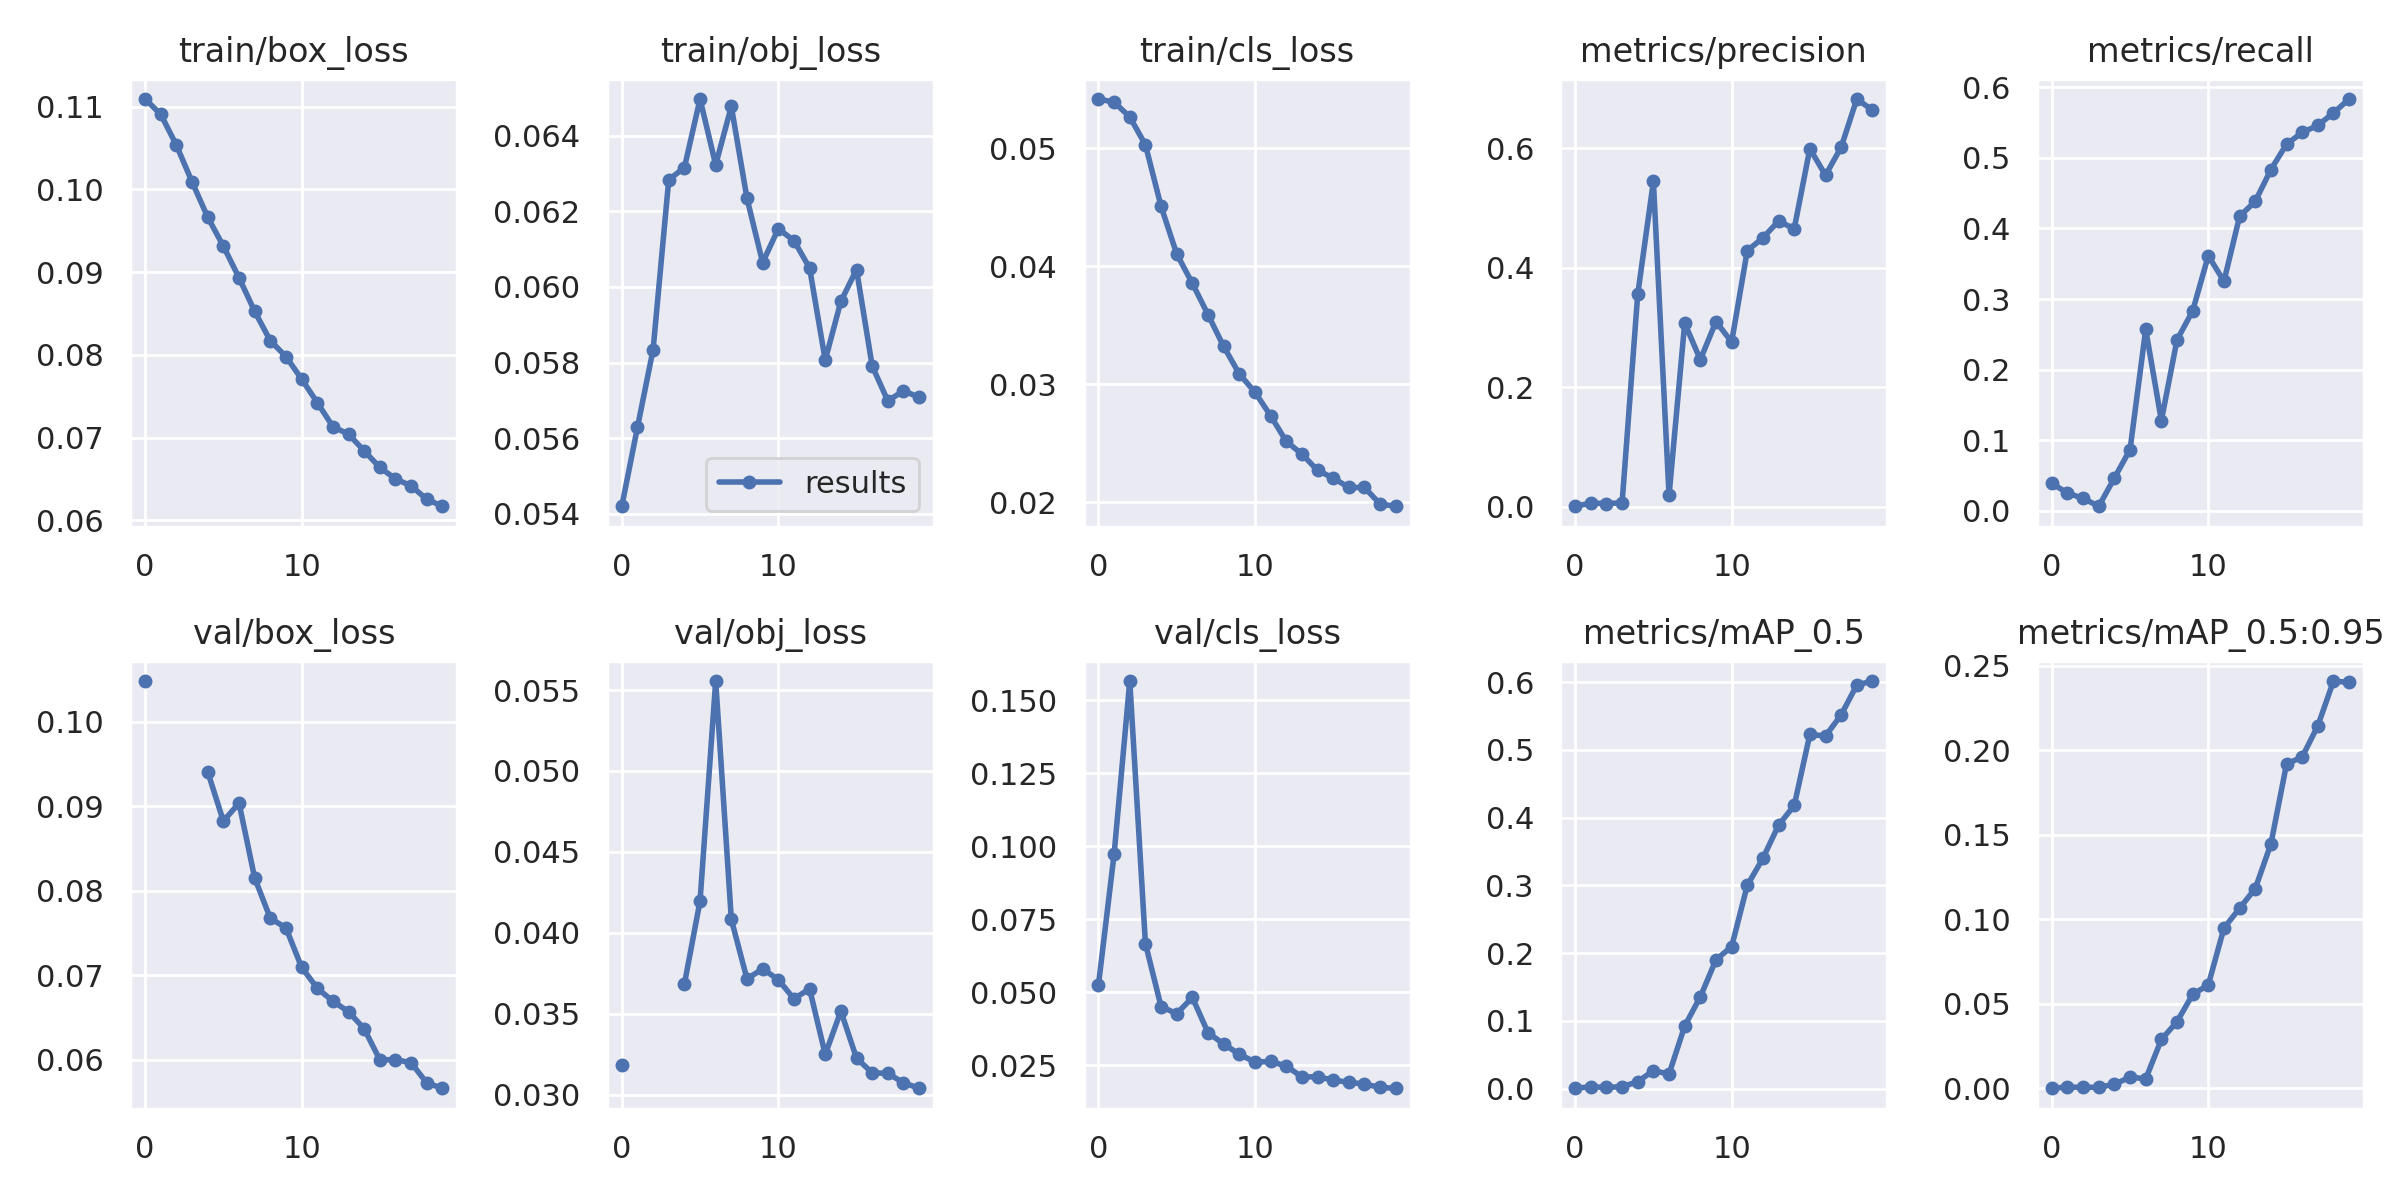

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/drive/MyDrive/Project_SKOTA/yolov5/runs/train/yolov5xnew_results2/results.png', width=1000)  # view results.png

### Curious? Visualize Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.

Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Glenn Jocher and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

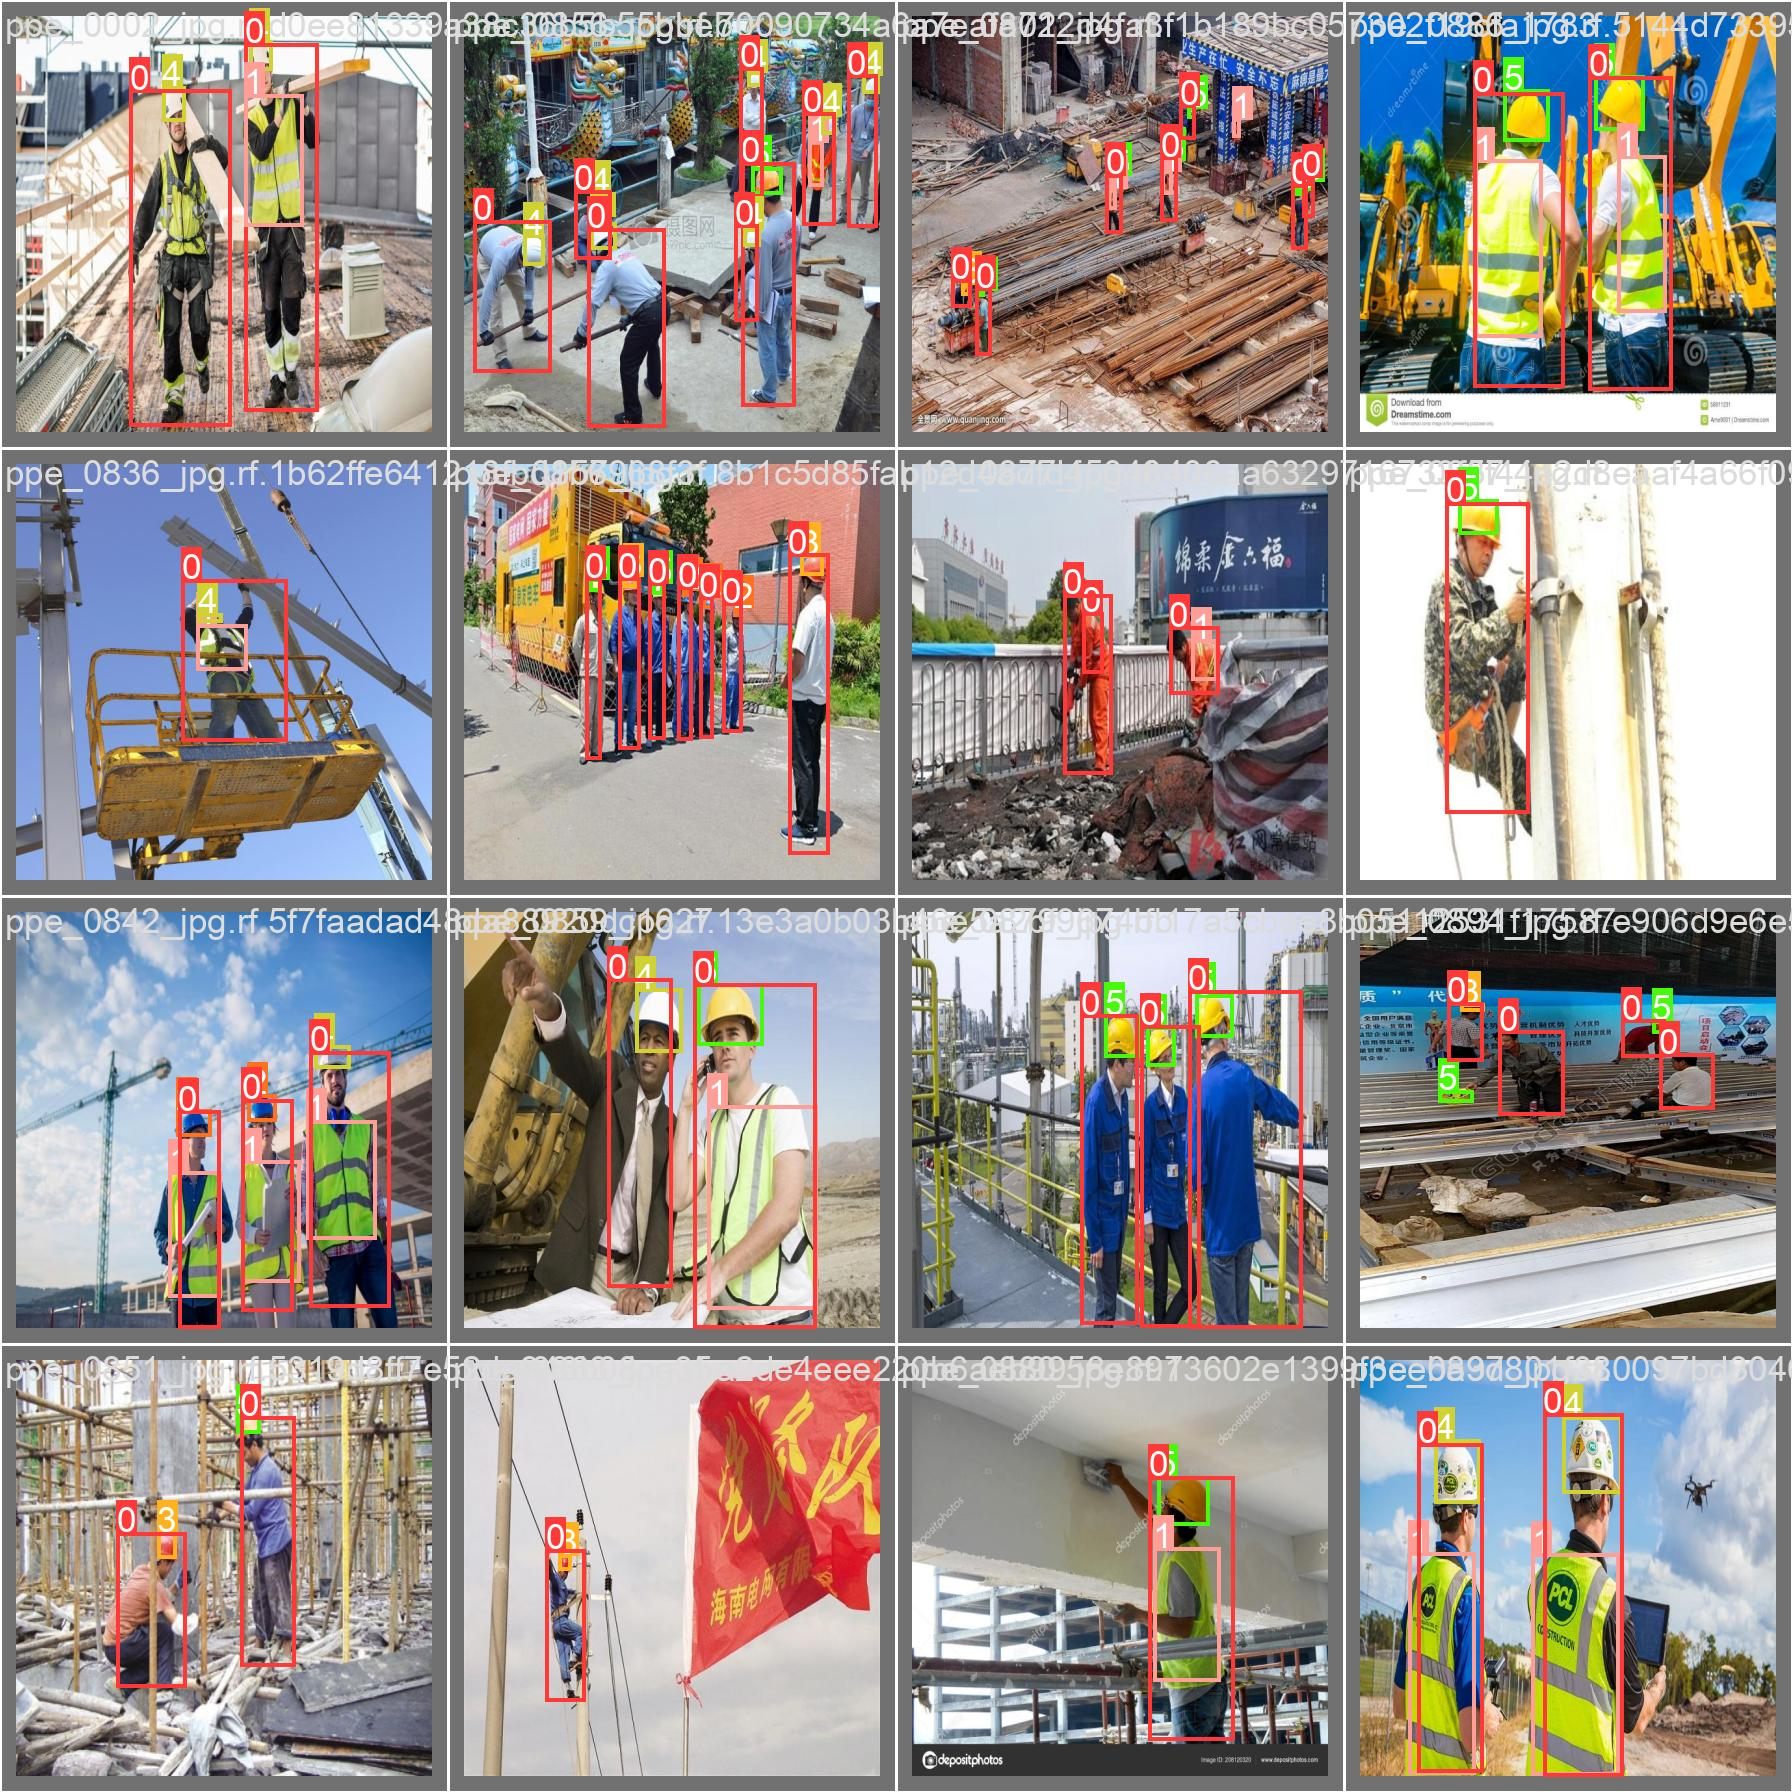

In [ ]:
Image(filename='/content/drive/MyDrive/Project_SKOTA/yolov5/runs/train/yolov5xnew_results2/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


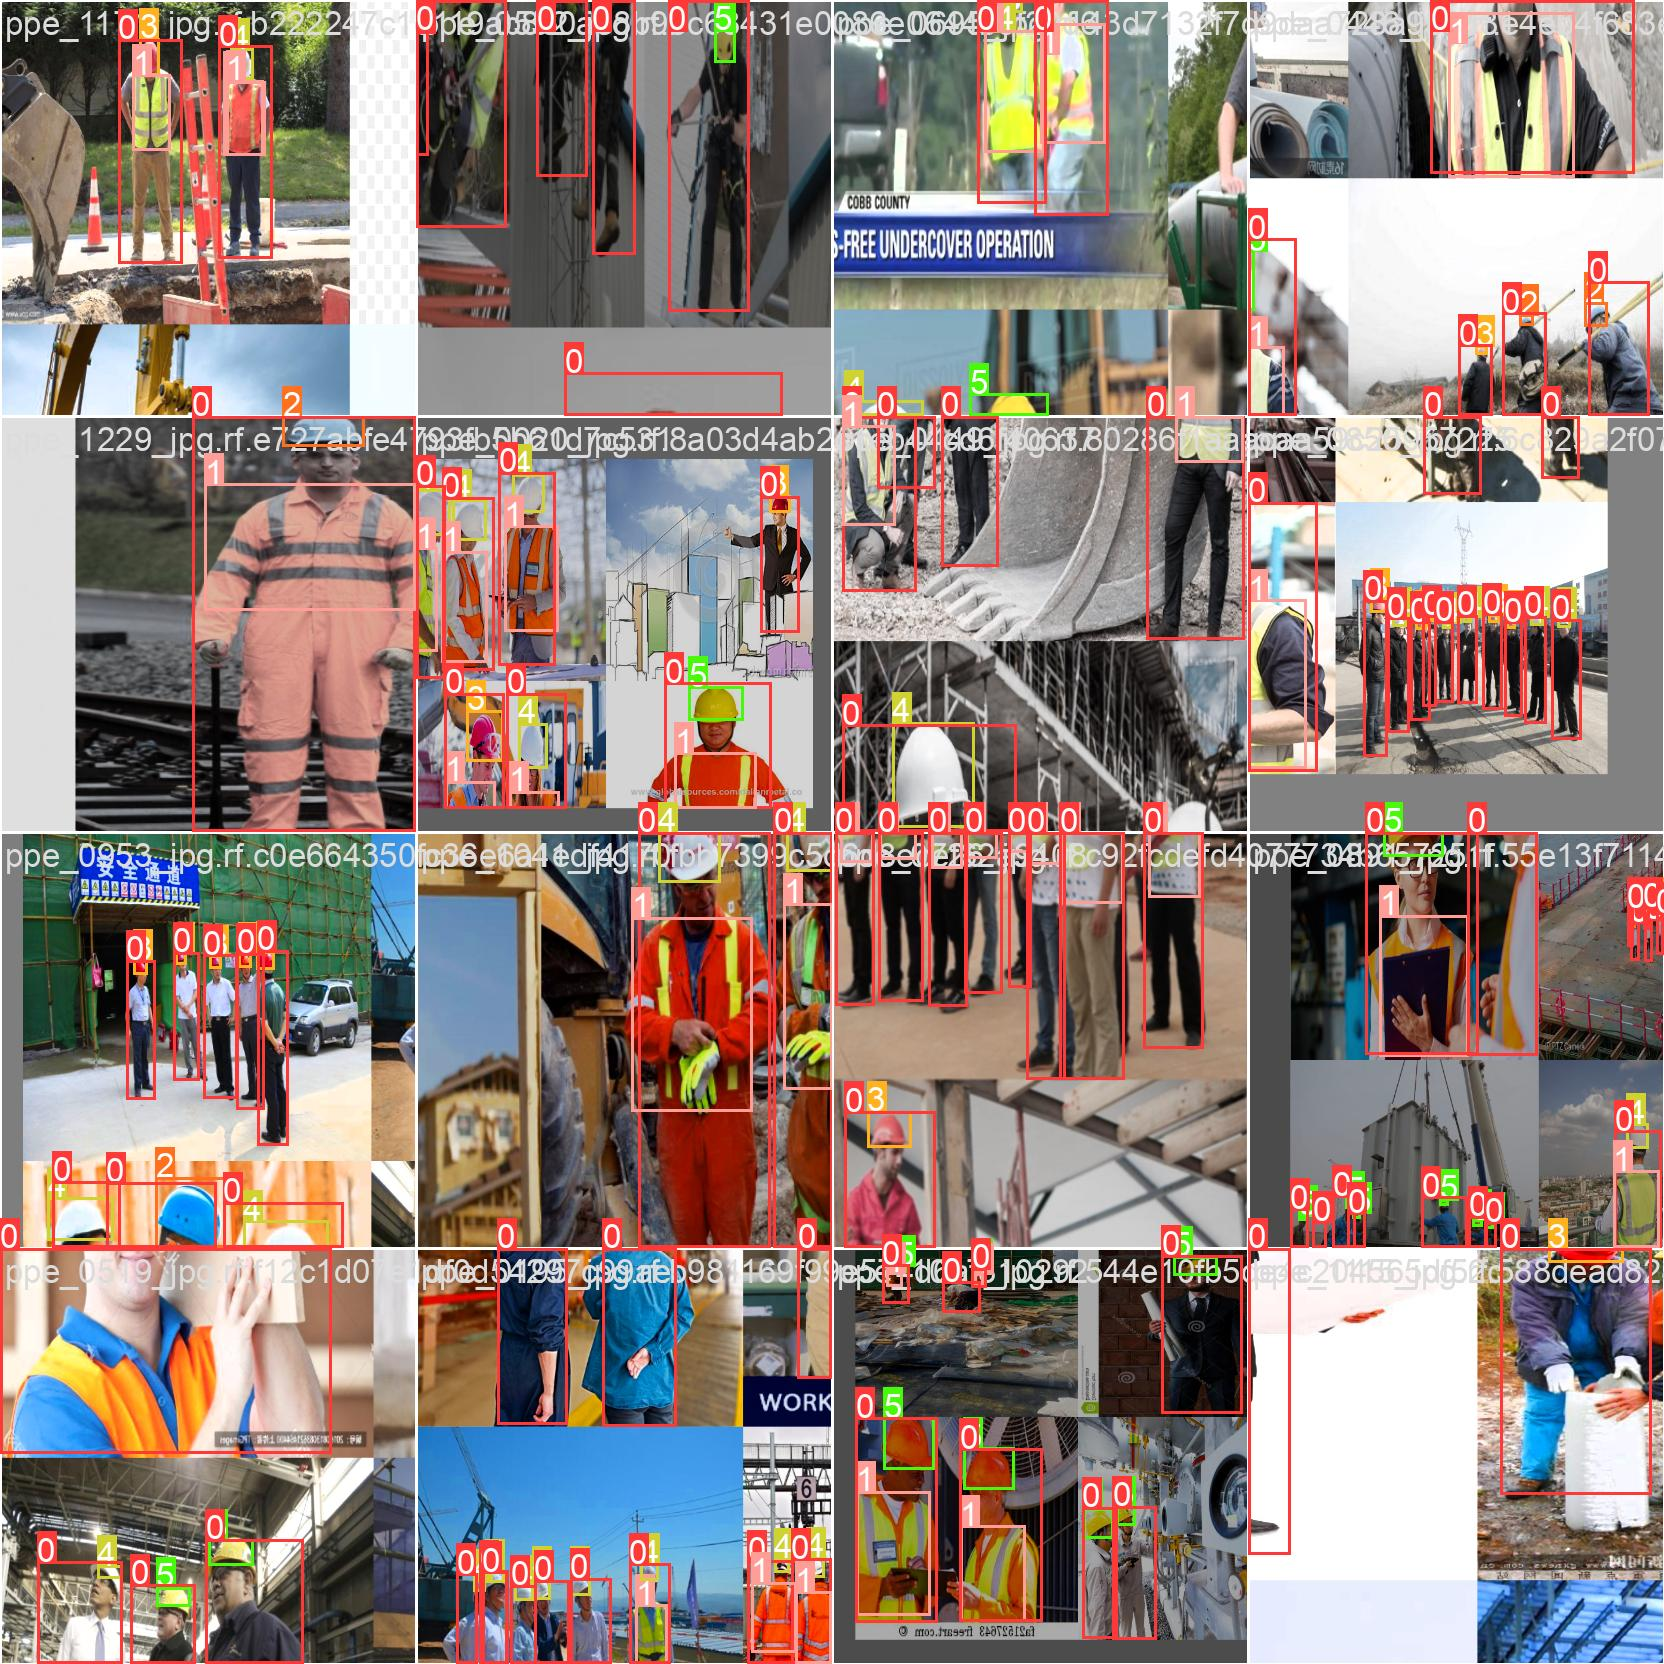

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/drive/MyDrive/Project_SKOTA/yolov5/runs/train/yolov5x_results2/train_batch0.jpg', width=900)

# Run Inference With Trained Weights

Next, we can run inference with a pretrained checkpoint on all images in the `test/images` folder to understand how our model performs on our test set.

In [ ]:
# trained weights are saved by default in our weights folder
%ls /content/drive/MyDrive/Project_SKOTA/yolov5/runs

detect/  train/


In [ ]:
%ls /content/drive/MyDrive/Project_SKOTA/yolov5/runs/train/yolov5xnew_results2/weights

best.pt  last.pt


In the snippet below, replace `Cash-Counter-10` with the name of the folder in which your dataset is stored.

In [ ]:
%cd /content/yolov5/
!python detect.py --weights /content/drive/MyDrive/Project_SKOTA/yolov5/runs/train/yolov5xnew_results2/weights/best.pt --img 416 --conf 0.4 --source /content/drive/MyDrive/Project_SKOTA/yolov5/testing/videos/industry_ppe.mp4

[Errno 2] No such file or directory: '/content/yolov5/'
/content/drive/.shortcut-targets-by-id/1XY23saDOZuVaB9PTJO2BU3x__m_LkGi5/Project_SKOTA/yolov5
detect: weights=['/content/drive/MyDrive/Project_SKOTA/yolov5/runs/train/yolov5xnew_results2/weights/best.pt'], source=/content/drive/MyDrive/Project_SKOTA/yolov5/testing/videos/industry_ppe.mp4, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d8 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86207059 parameters, 0 gradients, 203.9 GFLOPs
video 1/1 (1/1203) /content/drive/.shortcut-targets-by-id/1XY23saDOZuVaB9PTJO